# K-means聚类算法
## 算法原理
- K-means是一种无监督学习算法，用于将数据集划分为K个簇（clusters）。

## 算法步骤：
  1. 初始化：随机选择K个初始质心（centroids）。
  2. 分配：将每个数据点分配给距离最近的质心所属的簇。
  3. 更新：计算每个簇的质心，即簇内所有点的均值。
  4. 重复步骤2和3，直到质心不再变化或达到最大迭代次数。
- K-means的目标是最小化簇内点到质心的平方距离之和。
- K-means适用于大规模数据集，但对初始质心敏感，可能陷入局部最优解。
- 选择合适的K值是K-means中的一个重要问题，常用的方法包括肘部法（Elbow Method）和轮廓系数（Silhouette Score）。
- K-means广泛应用于图像压缩、市场细分、社交网络分析等领域。
- K-means算法的时间复杂度为O(n*k*i)，其中n是数据点数量，k是簇的数量，i是迭代次数。
- K-means算法假设簇是凸的且大小相似，因此对于非凸形状或大小差异较大的簇效果较差。
- K-means算法对异常值敏感，异常值可能会显著影响质心的位置。
- K-means算法可以通过多次运行并选择最佳结果来缓解初始质心选择的问题。
### 无监督学习之聚类算法的介绍
- 聚类算法是一种无监督学习方法，用于将数据集划分为若干个簇，使得同一簇内的数据点相似度较高，而不同簇之间的数据点相似度较低。
- 常见的聚类算法包括K-means、层次聚类（Hierarchical Clustering）、DBSCAN（Density-Based Spatial Clustering of Applications with Noise）等。


## 模型评估方法
- SSE误差平方和（Sum of Squared Errors）：衡量簇内数据点与质心之间的距离平方和，SSE越小表示聚类效果越好。
    - 数学公式
        $$ SSE = \sum_{i=1}^{k} \sum_{x \in C_i} ||x - \mu_i||^2 $$
        其中，k为簇的数量，$C_i$为第i个簇，$μ_i$为第i个簇的质心，x为簇内的数据点。
- 肘部法则（Elbow Method）：通过绘制不同K值下的SSE曲线，选择SSE下降速度明显减缓的K值作为最佳簇数。
    - 流程及原理
        1. 计算不同K值下的SSE。
        2. 绘制K值与SSE的关系图。
        3. 观察图形，选择“SSE下降速度明显减缓”的点作为最佳K值。
- 轮廓系数（Silhouette Score）：衡量数据点与其所在簇内其他点的相似度与其与最近簇的相似度之比值，取值范围为[-1, 1]，值越大表示聚类效果越好。
    - 数学公式
        $$ s(i) = \frac{b(i) - a(i)}{max(a(i), b(i))} $$
        其中，$s(i)$为数据点i的轮廓系数，$a(i)$为数据点i与同簇内其他点的平均距离，$b(i)$为数据点i与最近簇内点的平均距离。
- 轮廓系数的平均值可以作为整体聚类效果的评估指标，值越接近1表示聚类效果越好，值接近0表示聚类效果较差，值为负表示数据点可能被错误地分配到了簇中。
- CH指数（Calinski-Harabasz Index）：衡量簇间距离与簇内距离的比值，值越大表示聚类效果越好。
    - 数学公式
        $$ CH = \frac{Tr(B_k)}{Tr(W_k)} \times \frac{N - k}{k - 1} $$
        其中，$Tr(B_k)$为簇间离散度矩阵的迹，$Tr(W_k)$为簇内离散度矩阵的迹，N为数据点总数，k为簇的数量。


In [31]:


# 导入依赖包
from sklearn.cluster import KMeans # 导入Kmeans包
import matplotlib.pyplot as plt
from sklearn.metrics import calinski_harabasz_score, silhouette_score
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split # 分割数据集

import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# 正常显示中文
# 正常显示负号
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False

# 数据集中的特征解释

| 特征 | 数据类型 | 取值 / 范围 | 描述 |
|---|---|---|---|
| ID | 数值型（整数） | 整数 | 表示客户的唯一标识符。 |
| Sex | 分类型 | {0, 1}<br>0：男性<br>1：女性 | 客户的生物学性别（数据集中只有两种选项）。 |
| Marital status | 分类型 | {0, 1}<br>0：单身<br>1：非单身（离婚 / 分居 / 已婚 / 寡居） | 客户的婚姻状况。 |
| Age | 数值型（整数） | 整数，范围：18 – 76<br>最小值：18<br>最大值：76 | 客户年龄（岁），按创建数据集时的当前年份减去出生年份计算。 |
| Education | 分类型 | {0, 1, 2, 3}<br>0：其他 / 未知<br>1：高中<br>2：大学<br>3：研究生 | 客户的教育水平。 |
| Income | 数值型（实数） | 实数，范围：35,832 – 309,364<br>最小值：35,832<br>最大值：309,364 | 客户自报的年收入（美元）。 |
| Occupation | 分类型 | {0, 1, 2}<br>0：失业 / 非熟练<br>1：有技能的雇员 / 职员<br>2：管理层 / 自雇 / 高技能员工 / 高级职员 | 客户的职业类别。 |
| Settlement size | 分类型 | {0, 1, 2}<br>0：小城市<br>1：中等城市<br>2：大城市 | 客户所在城市的规模。 |

In [32]:
# 1. 加载数据
data = pd.read_csv('../../../datasets/客户群聚类数据集/data/segmentation data.csv')
print(data.shape)
print(data.head())

(2000, 8)
          ID  Sex  Marital status  Age  Education  Income  Occupation  \
0  100000001    0               0   67          2  124670           1   
1  100000002    1               1   22          1  150773           1   
2  100000003    0               0   49          1   89210           0   
3  100000004    0               0   45          1  171565           1   
4  100000005    0               0   53          1  149031           1   

   Settlement size  
0                2  
1                2  
2                0  
3                1  
4                1  


In [33]:
# 2. 数据预处理
# 丢弃ID列
data = data.drop(columns=['ID'])
# 特征分组
num_cols = ['Age', 'Income']
cat_cols = ['Sex', 'Marital status', 'Education', 'Occupation', 'Settlement size']

# 3. 特征工程
# 数值特征标准化
scaler = StandardScaler()
num_scaled = scaler.fit_transform(data[num_cols])
# 类别特征独热编码
ohe = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')
cat_encoded = ohe.fit_transform(data[cat_cols])
# 合并特征矩阵
X = np.hstack([num_scaled, cat_encoded])

print("特征矩阵形状：", X.shape)

特征矩阵形状： (2000, 11)


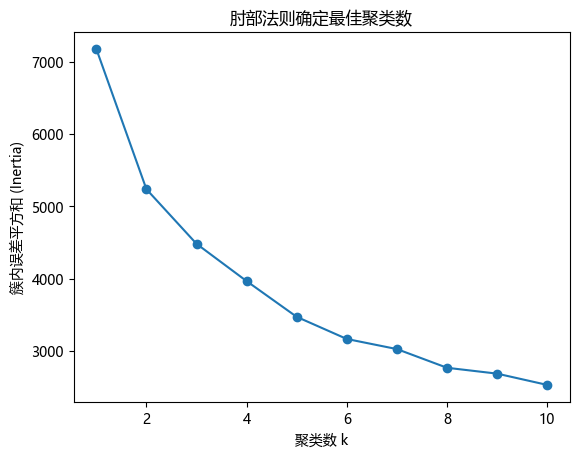

聚类数: 1, 簇内误差平方和: 7175.136
聚类数: 2, 簇内误差平方和: 5237.668526165448
聚类数: 3, 簇内误差平方和: 4483.65536677272
聚类数: 4, 簇内误差平方和: 3968.403788991933
聚类数: 5, 簇内误差平方和: 3474.953888815462
聚类数: 6, 簇内误差平方和: 3169.3200226856343
聚类数: 7, 簇内误差平方和: 3029.828737579327
聚类数: 8, 簇内误差平方和: 2771.7134724217835
聚类数: 9, 簇内误差平方和: 2690.7483605368266
聚类数: 10, 簇内误差平方和: 2534.9490298993924
聚类数从 1 变为 2 时，簇内误差平方和下降了: 1937.467473834552
聚类数从 2 变为 3 时，簇内误差平方和下降了: 754.0131593927281
聚类数从 3 变为 4 时，簇内误差平方和下降了: 515.2515777807871
聚类数从 4 变为 5 时，簇内误差平方和下降了: 493.44990017647115
聚类数从 5 变为 6 时，簇内误差平方和下降了: 305.63386612982777
聚类数从 6 变为 7 时，簇内误差平方和下降了: 139.49128510630726
聚类数从 7 变为 8 时，簇内误差平方和下降了: 258.1152651575435
聚类数从 8 变为 9 时，簇内误差平方和下降了: 80.96511188495697
聚类数从 9 变为 10 时，簇内误差平方和下降了: 155.7993306374342


In [34]:
# 通过肘部法则选择最佳聚类数

inertia_list = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia_list.append(kmeans.inertia_)
# 绘制肘部图
plt.plot(k_range, inertia_list, marker='o')
plt.xlabel('聚类数 k')
plt.ylabel('簇内误差平方和 (Inertia)')
plt.title('肘部法则确定最佳聚类数')
plt.show()

# 打印每一个聚类数对应的簇内误差平方和
for k, inertia in zip(k_range, inertia_list):
    print(f"聚类数: {k}, 簇内误差平方和: {inertia}")    

# 打印每两个聚类数之间的误差下降情况
for i in range(1, len(inertia_list)):
    decrease = inertia_list[i-1] - inertia_list[i]
    print(f"聚类数从 {i} 变为 {i+1} 时，簇内误差平方和下降了: {decrease}")
    

In [35]:
# 4. 模型训练
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [36]:
# 5. 模型预测
labels = kmeans.predict(X)
# 保存结果
data['标签'] = labels
data.to_csv('segmentation_result.csv', index=False)

In [37]:
# 6. 模型评估
ch_score = calinski_harabasz_score(X, labels)
print("Calinski-Harabasz指数：", ch_score)
sil_score = silhouette_score(X, labels)
print("轮廓系数：", sil_score)


Calinski-Harabasz指数： 599.3867040257877
轮廓系数： 0.22212817897983328


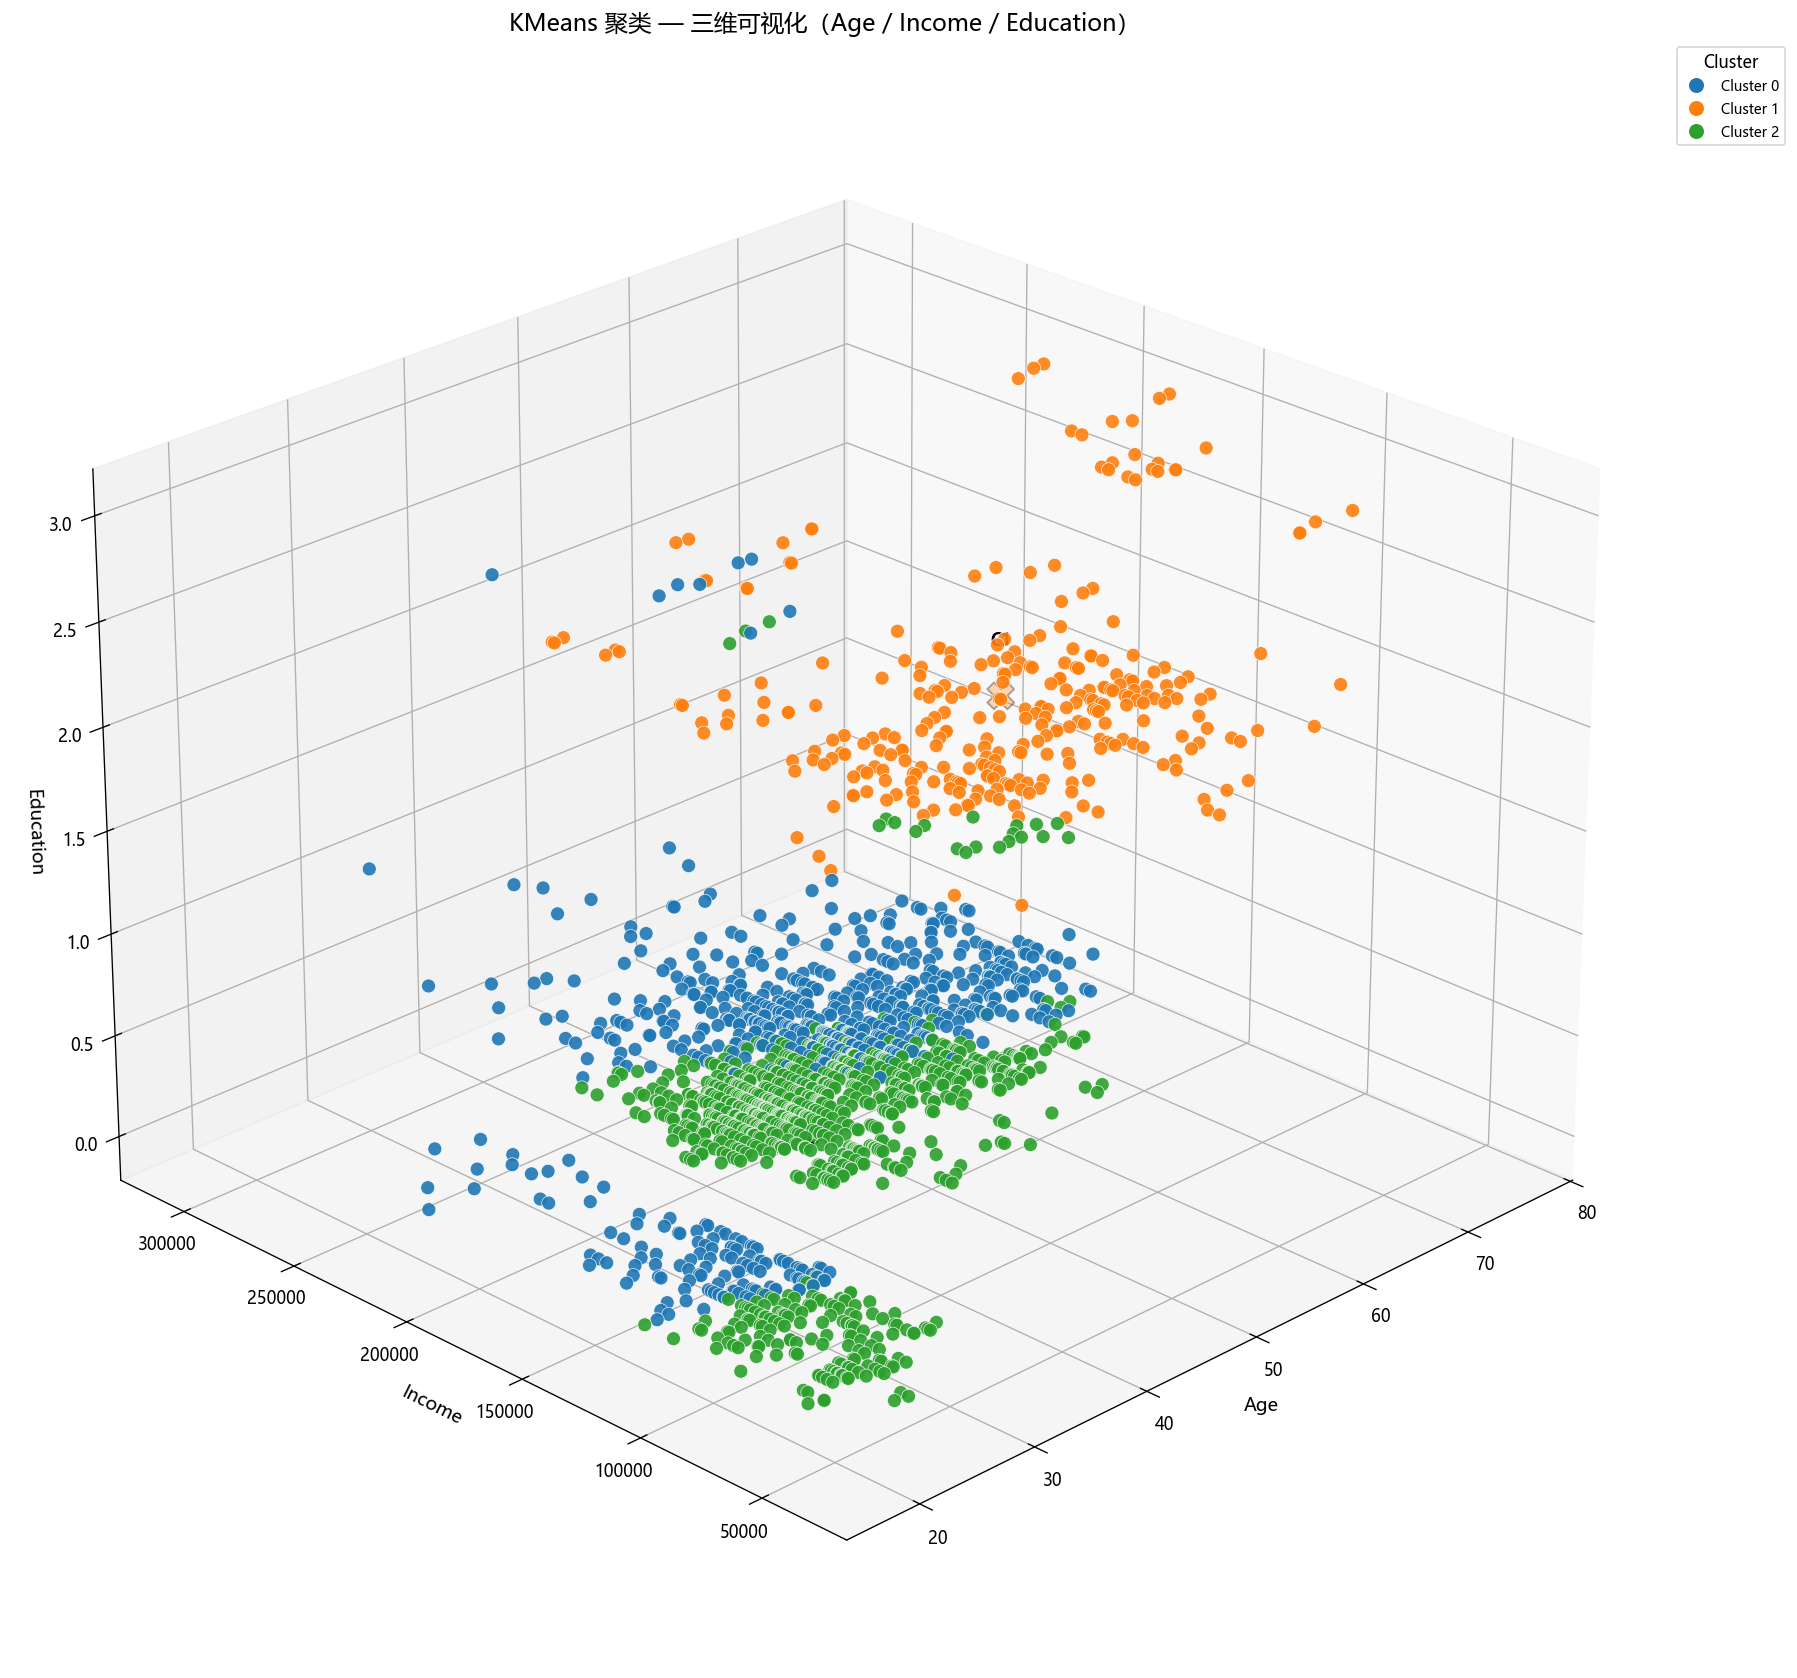

In [38]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.lines as mlines

try:
    labels
except NameError:
    labels = kmeans.predict(X)
data['Cluster'] = labels

x = data['Age'].values
y = data['Income'].values
z = data['Education'].values

fig = plt.figure(figsize=(15,15), dpi=120)
ax = fig.add_subplot(111, projection='3d')

cmap = plt.get_cmap('tab10')
unique = np.unique(labels)
unique_sorted = np.sort(unique)
color_map = {lab: cmap(i % cmap.N) for i, lab in enumerate(unique_sorted)}
colors = [color_map[int(l)] for l in labels]


sc = ax.scatter(x, y, z, c=colors, s=70, alpha=0.9, edgecolors='w', linewidth=0.4)

centers = data.groupby('Cluster')[['Age','Income','Education']].mean().reset_index()
centroid_colors = [color_map[int(row['Cluster'])] for _, row in centers.iterrows()]
ax.scatter(centers['Age'], centers['Income'], centers['Education'],
           c=centroid_colors, s=260, marker='X', edgecolors='k', linewidths=1.2)

z_offset = 0.06 * (data['Education'].max() - data['Education'].min() + 1)
for _, row in centers.iterrows():
    ax.text(row['Age'], row['Income'], row['Education'] + z_offset,
            f"C{int(row['Cluster'])}", color='k', fontsize=10, weight='bold', ha='center')

ax.set_xlabel('Age', fontsize=11)
ax.set_ylabel('Income', fontsize=11)
ax.set_zlabel('Education', fontsize=11)
ax.set_title('KMeans 聚类 — 三维可视化（Age / Income / Education）', fontsize=14)


proxies = [mlines.Line2D([], [], color=color_map[lab], marker='o', linestyle='None', markersize=8) for lab in unique_sorted]
ax.legend(proxies, [f'Cluster {int(l)}' for l in unique_sorted], title='Cluster',
          loc='upper left', bbox_to_anchor=(1.02, 1), fontsize='small')

ax.grid(True)
ax.view_init(elev=25, azim=225)
plt.tight_layout()
plt.show()

In [39]:
from sklearn.decomposition import PCA

# 使用已有特征矩阵 X（数值已标准化并包含 one-hot 编码）做 PCA
pca_3 = PCA(n_components=3, random_state=42)
pca_result_3 = pca_3.fit_transform(X)

# 把主成分加入 data，便于后续绘图与分组统计
data = data.copy()
data[['PC1', 'PC2', 'PC3']] = pca_result_3

data.to_csv('segmentation_pca.csv', index=False)

# 打印解释方差比，确认信息量
print('Explained variance ratio (3 components):', pca_3.explained_variance_ratio_)


Explained variance ratio (3 components): [0.41218345 0.20292977 0.1066387 ]


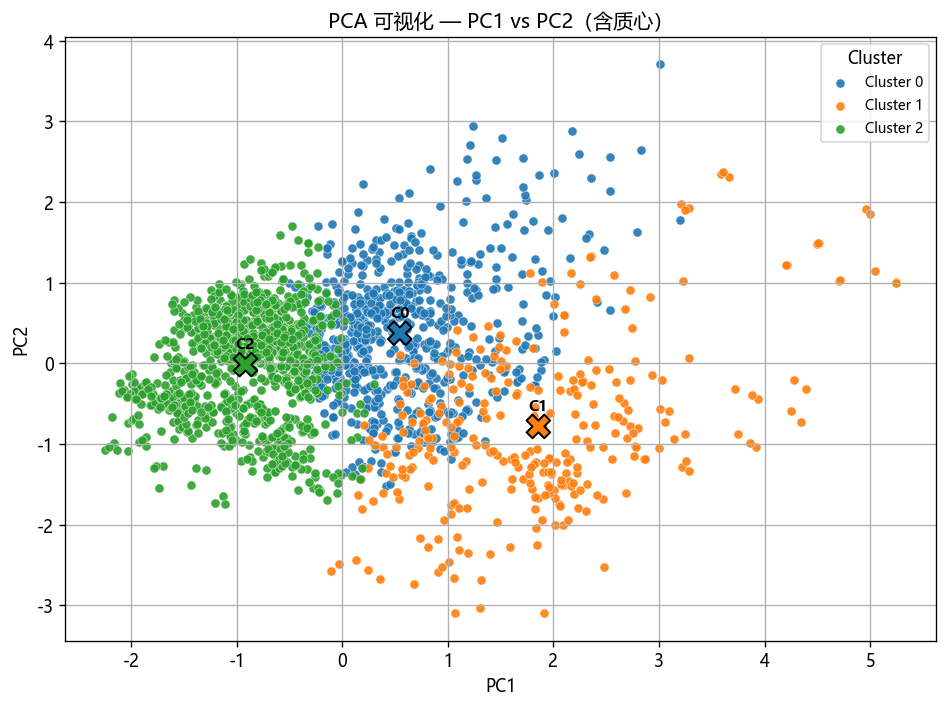

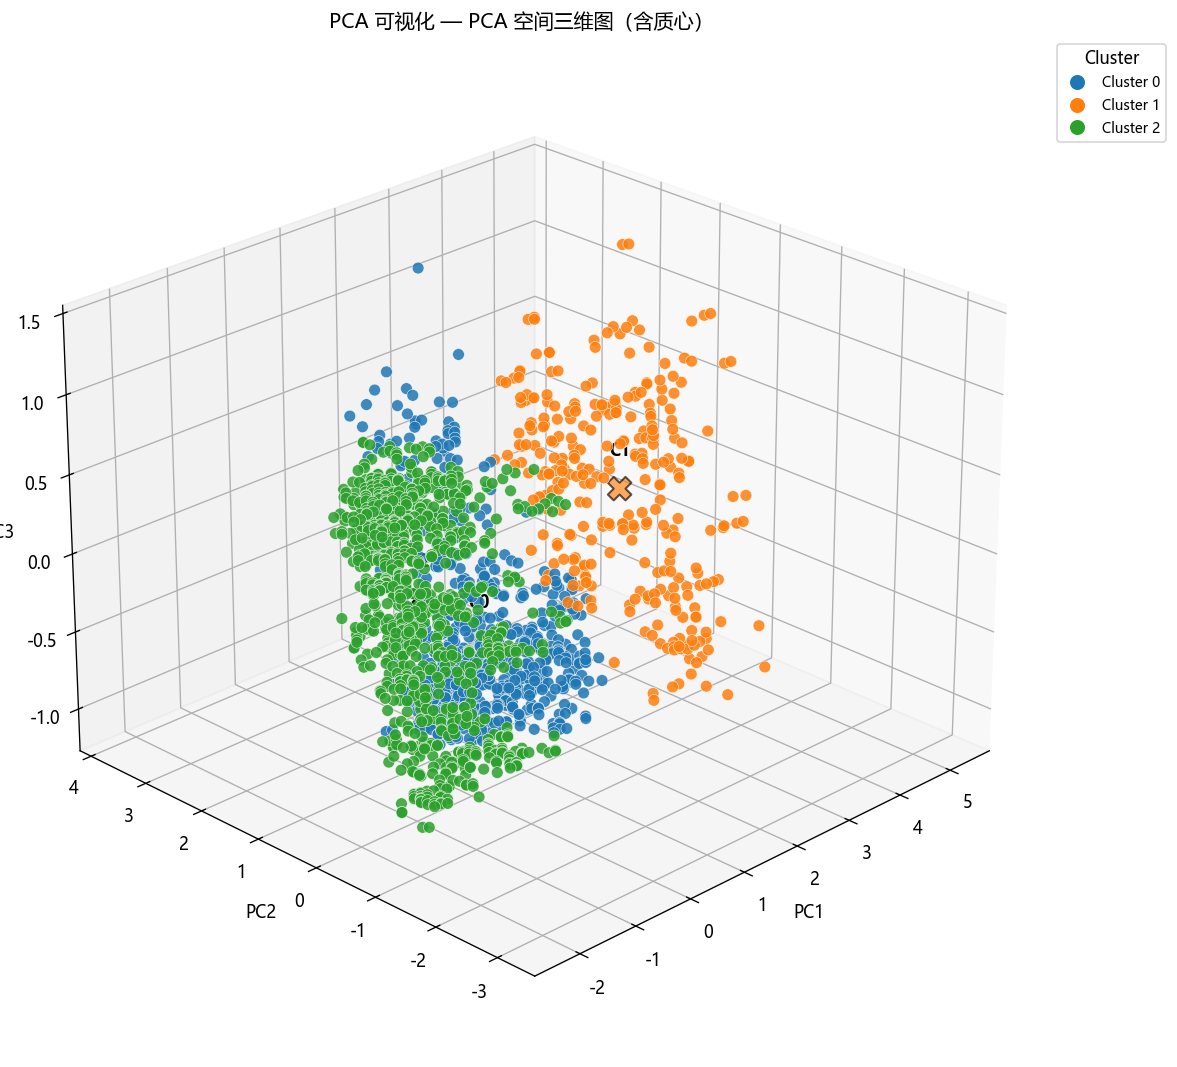

In [40]:

import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.lines as mlines

# 确保已经有 PCA 列和 labels
try:
    data[['PC1','PC2','PC3']]
except Exception as e:
    raise RuntimeError("请先运行 PCA 计算单元以生成 PC1/PC2/PC3") from e

try:
    labels = data['Cluster'].values
except Exception:
    labels = kmeans.predict(X)
    data['Cluster'] = labels

unique = np.unique(labels)
unique_sorted = np.sort(unique)

# 颜色映射（与前面可视化保持一致）
cmap = plt.get_cmap('tab10')
color_map = {lab: cmap(i % cmap.N) for i, lab in enumerate(unique_sorted)}
colors = [color_map[int(l)] for l in labels]

# 计算 PCA 空间的簇质心（用于 2D 与 3D）
centers_pca = data.groupby('Cluster')[['PC1','PC2','PC3']].mean().reset_index()
centroid_colors = [color_map[int(c)] for c in centers_pca['Cluster']]

# --- 2D 可视化：PC1 vs PC2（含质心） ---
fig, ax = plt.subplots(figsize=(8,6), dpi=120)
for lab in unique_sorted:
    mask = (labels == lab)
    ax.scatter(data.loc[mask, 'PC1'], data.loc[mask, 'PC2'],
               c=[color_map[int(lab)]], label=f'Cluster {int(lab)}', s=30, alpha=0.9, edgecolors='w', linewidth=0.3)

# 绘制质心（大 X 标记）并添加标签
ax.scatter(centers_pca['PC1'], centers_pca['PC2'],
           c=centroid_colors, s=200, marker='X', edgecolors='k', linewidths=1.2, zorder=5)
# 质心标签稍做偏移
xy_offset = 0.02 * (data['PC2'].max() - data['PC2'].min() + 1)
for _, row in centers_pca.iterrows():
    ax.text(row['PC1'], row['PC2'] + xy_offset, f"C{int(row['Cluster'])}", fontsize=9, weight='bold', ha='center', va='bottom')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('PCA 可视化 — PC1 vs PC2（含质心）')
ax.legend(title='Cluster', loc='best', fontsize='small')
ax.grid(True)
plt.tight_layout()
plt.show()

# --- 3D 可视化：PC1 / PC2 / PC3（含质心） ---
fig = plt.figure(figsize=(10,9), dpi=120)
ax3 = fig.add_subplot(111, projection='3d')

ax3.scatter(data['PC1'], data['PC2'], data['PC3'], c=colors, s=50, alpha=0.85, edgecolors='w', linewidth=0.35)

ax3.scatter(centers_pca['PC1'], centers_pca['PC2'], centers_pca['PC3'],
            c=centroid_colors, s=200, marker='X', edgecolors='k', linewidths=1.2, zorder=5)

# 在 3D 质心添加标签
z_offset = 0.06 * (data['PC3'].max() - data['PC3'].min() + 1)
for _, row in centers_pca.iterrows():
    ax3.text(row['PC1'], row['PC2'], row['PC3'] + z_offset, f"C{int(row['Cluster'])}", color='k', fontsize=10, weight='bold', ha='center')

ax3.set_xlabel('PC1')
ax3.set_ylabel('PC2')
ax3.set_zlabel('PC3')
ax3.set_title('PCA 可视化 — PCA 空间三维图（含质心）')

# 构造与颜色对应的图例代理
proxies = [mlines.Line2D([], [], color=color_map[lab], marker='o', linestyle='None', markersize=8) for lab in unique_sorted]
ax3.legend(proxies, [f'Cluster {int(l)}' for l in unique_sorted], title='Cluster',
           loc='upper left', bbox_to_anchor=(1.02, 1), fontsize='small')

ax3.view_init(elev=25, azim=225)
plt.tight_layout()
plt.show()
